In [ ]:
# Dependencies
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Let's import our Chess games
df = pd.read_csv('drive/My Drive/Colab Datasets/Chess/games_moves_split_filled.csv')

df.head(10)

In [ ]:
# Split string-moves into arrays
# df['moves'] = df['moves'].str.split()

In [ ]:
#Changing pandas dataframe to numpy array
x = df.loc[:, ~df.columns.isin(['winner'])].values
y = df.loc[:, df.columns == 'winner'].values

In [ ]:
x

array([['e4', 'e5', 'd3', ..., 'GG', 'GG', 'GG'],
       ['d4', 'd5', 'Nf3', ..., 'GG', 'GG', 'GG'],
       ['e4', 'e5', 'Nf3', ..., 'GG', 'GG', 'GG'],
       ...,
       ['d4', 'd6', 'Bf4', ..., 'GG', 'GG', 'GG'],
       ['d4', 'd5', 'Bf4', ..., 'GG', 'GG', 'GG'],
       ['d4', 'd5', 'Bf4', ..., 'GG', 'GG', 'GG']], dtype=object)

In [ ]:
# Encode moves
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
x = ohe.fit_transform(x).toarray()

In [ ]:
x[0]

array([0., 0., 0., ..., 0., 1., 0.])

In [ ]:
# Change inputs to binary
from keras.utils import to_categorical
y = to_categorical(y)

Using TensorFlow backend.


In [ ]:
y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
# Split into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [ ]:
# Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Neural network
model = Sequential()
# model.add(Dropout(0.5, input_shape=(86308,)))
model.add(Dense(16, input_dim=86308, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0001)

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=25, batch_size=64)

Train on 6507 samples, validate on 724 samples
Epoch 1/25
6507/6507 [==============================] - 6s 880us/step - loss: 1.0129 - accuracy: 0.4314 - val_loss: 0.9523 - val_accuracy: 0.5249
Epoch 2/25
6507/6507 [==============================] - 5s 822us/step - loss: 0.9706 - accuracy: 0.4898 - val_loss: 0.9310 - val_accuracy: 0.6050
Epoch 3/25
6507/6507 [==============================] - 5s 838us/step - loss: 0.9365 - accuracy: 0.5419 - val_loss: 0.9268 - val_accuracy: 0.5608
Epoch 4/25
6507/6507 [==============================] - 6s 858us/step - loss: 0.8913 - accuracy: 0.5957 - val_loss: 0.8950 - val_accuracy: 0.6464
Epoch 5/25
6507/6507 [==============================] - 6s 848us/step - loss: 0.8359 - accuracy: 0.6562 - val_loss: 0.8772 - val_accuracy: 0.6464
Epoch 6/25
6507/6507 [==============================] - 6s 867us/step - loss: 0.7749 - accuracy: 0.6948 - val_loss: 0.8567 - val_accuracy: 0.6547
Epoch 7/25
6507/6507 [==============================] - 6s 861us/step - loss:

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

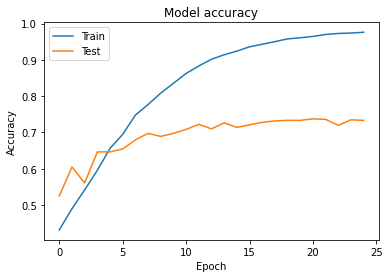

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

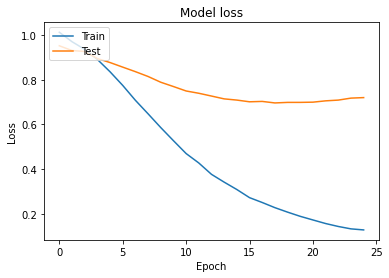

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [ ]:
# Grab a set of moves and split them to fit the formatting
moves_new = 'Nf3 Nf6 c4 g6 Nc3 Bg7 d4 O-O Bf4 d5 Qb3 dxc4 Qxc4 c6 e4 Nbd7 Rd1 Nb6 Qc5 Bg4 Bg5 GG Qa3 Nxc3 bxc3 Nxe4 Bxe7 Qb6 Bc4 Nxc3 Bc5 GG Kf1 Be6 Bxb6 GG Kg1 Ne2+ Kf1 Nxd4+ Kg1 Ne2+ Kf1 Nc3+ Kg1 axb6 Qb4 Ra4 Qxb6 Nxd1 h3 Rxa2 Kh2 Nxf2 Re1 Rxe1 Qd8+ Bf8 GG Bd5 Nf3 Ne4 GG b5 h4 h5 Ne5 Kg7 Kg1 Bc5+ Kf1 Ng3+ Ke1 GG Kd1 GG Kc1 Ne2+ Kb1 GG Kc1 GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG GG'
moves_new = np.array(moves_new.split())
moves_new

In [ ]:
# Let's give it a scenario where we don't know what the best move is
x_new = ohe.transform(moves_new.reshape(1, -1))
x_new

<1x86308 sparse matrix of type '<class 'numpy.float64'>'
	with 259 stored elements in Compressed Sparse Row format>

In [ ]:
# Ask it for the answer and print it
y_new = model.predict(x_new)
y_new

array([[0.9778407 , 0.005334  , 0.01682527]], dtype=float32)

In [ ]:
# Use this to get AUROC
import sklearn.metrics

fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true = true_labels, y_score = pred_probs, pos_label = 1) #positive class is 1; negative class is 0
auroc = sklearn.metrics.auc(fpr, tpr)